# Modeling - COVID19 Survival Prediction

In this section, we will evaluate and compare the accuracy of the dataset both before and after the application of one-hot encoding. We will employ multiple models, such as logistic regression, random forest, gradient boosting, and XG boosting, for the comparative analysis. Before employing the models, PCA will be applied to identify the necessary features as well as reduce the dimentionality and complexity of the model.

In [43]:
# import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
# import the dataset after applying one-hot encoding
# data is retrieved from https://www.kaggle.com/datasets/meirnizri/covid19-dataset/data
df = pd.read_csv('/Users/Angela/casestudy/Capstone_Two/data/covid_data_train.csv')
df.head()

,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,...,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,1,1,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,0,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
X = df.drop(columns='DEATH')
y = df['DEATH']

X_scaled =  StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24)

In [4]:
# import the dataset before applying one-hot encoding

df_before = pd.read_csv('/Users/Angela/casestudy/Capstone_Two/data/covid_data_cleaned.csv')
df_before.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,1,65,0,0,0,0,1,0,0,0,0,0,3
1,2,1,0,1,1,1,72,0,0,0,0,1,0,0,1,1,0,5
2,2,1,0,0,1,0,55,1,0,0,0,0,0,0,0,0,0,3
3,2,1,1,1,1,0,53,0,0,0,0,0,0,0,0,0,0,7
4,2,1,0,1,1,0,68,1,0,0,0,1,0,0,0,0,0,3


In [5]:
X_before = df_before.drop(columns='DEATH')
y_before = df_before['DEATH']

X_scaled_before =  StandardScaler().fit_transform(X_before)

X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X_scaled_before, y_before, test_size=0.3, random_state=24)

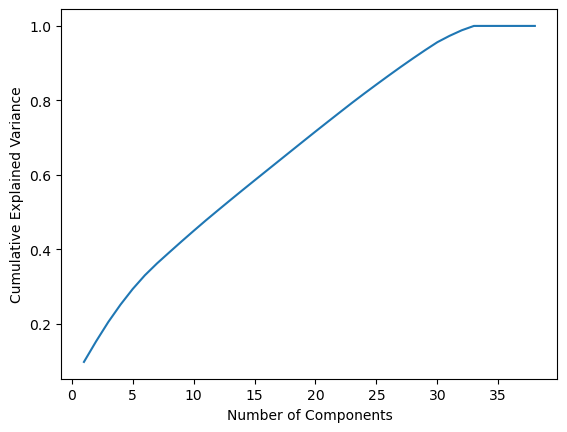

In [6]:
# Initiate PCA
pca = PCA()

# Fit on the data 
pca.fit(X_scaled)

# Plot explained variance ratio to decide on the number of components
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

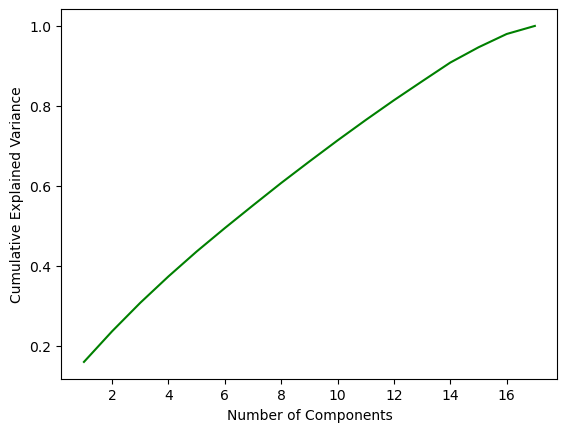

In [7]:
# Fit on the data after one-hot encoding
pca.fit(X_scaled_before)

# Plot explained variance ratio to decide on the number of components
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), color='green')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Before applying one-hot encoding to the data, it can be observed that all features play a significant role in constructing the model. However, post one-hot encoding, out of the 35 components approximately 33 are identified as important. Therefore, it is reasonable to reduce the component number to 33 when constructing models for the dataset after applying one-hot encoding.

In [8]:
# apply PCA method to dataset

pca = PCA(n_components = 35)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ 
# we can observe that the the 34th component - '2.87394056e-29' contribute very small portion of variance
# thus we will keep the component number to 33

array([3.67835061e+00, 2.10751034e+00, 1.97502810e+00, 1.76999268e+00,
       1.59579123e+00, 1.40364853e+00, 1.21538531e+00, 1.12069767e+00,
       1.11043278e+00, 1.08693215e+00, 1.07012134e+00, 1.03656458e+00,
       1.02741233e+00, 1.01677254e+00, 1.00607646e+00, 1.00133010e+00,
       1.00034667e+00, 9.99696384e-01, 9.98741286e-01, 9.94879324e-01,
       9.83275112e-01, 9.75984578e-01, 9.72098379e-01, 9.43866096e-01,
       9.22744966e-01, 9.09974922e-01, 8.93518641e-01, 8.68312481e-01,
       8.43541148e-01, 8.10342295e-01, 6.47988831e-01, 5.67571475e-01,
       4.45106898e-01, 2.87394056e-29, 8.24769496e-30])

In [9]:
pca = PCA(n_components = 33)
X_pca = pca.fit_transform(X_scaled)
X_train_pca1, X_test_pca1, y_train_pca1, y_test_pca1 = train_test_split(X_pca, y, test_size=0.3, random_state=30)

# Logistic Regression

Logistic Regression is a widely used method for binary classfication.

In [44]:
# fit the logistic regression model with training data (after one-hot encoding)

model_log = LogisticRegression(max_iter=500)
model_log.fit(X_train_pca1, y_train_pca1)

LogisticRegression(max_iter=500)

In [11]:
y_pred_pca1_log = model_log.predict(X_test_pca1)

acc_score_log = model_log.score(X_test_pca1, y_test_pca1)
print(f'the accuracy score of logistic regression for dataset (after one-hot encoding) is:{round(acc_score_log, 3)}')

the accuracy score of logistic regression for dataset (after one-hot encoding) is:0.94


In [45]:
f1_log_pca = f1_score(y_test_pca1, y_pred_pca1_log)

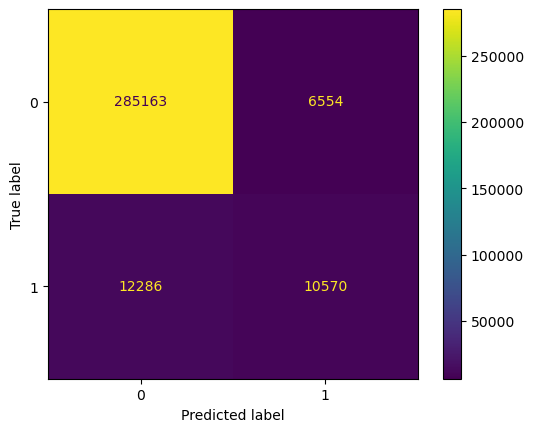

In [26]:
cm_log_pca = confusion_matrix(y_test_pca1, y_pred_pca1_log)
cm_display = ConfusionMatrixDisplay(cm_log_pca).plot()

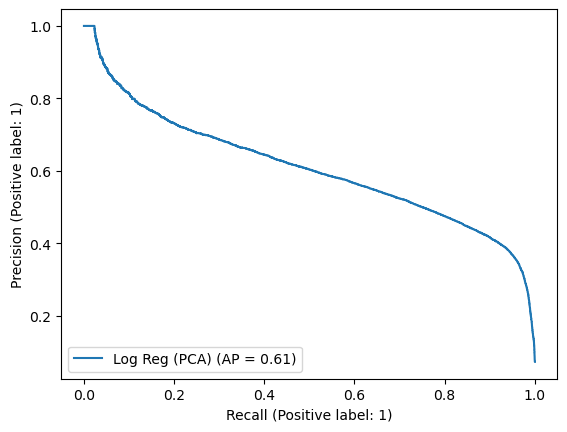

In [12]:
y_prob_log_pca = model_log.predict_proba(X_test_pca1)[:, 1]

# AUC (ROC)
auc_log_pca = round(roc_auc_score(y_test_pca1, y_prob_log_pca), 3)

# creating precision and recall curve
pr_log_pca, rc_log_pca, _ = precision_recall_curve(y_test_pca1, y_pred_pca1_log)
avr_pr_log_pca = average_precision_score(y_test_pca1, y_pred_pca1_log)
pr_auc_log = auc(pr_log_pca, rc_log_pca)
disp_log_pca = PrecisionRecallDisplay.from_predictions(y_test_pca1, y_prob_log_pca, name = 'Log Reg (PCA)')

In [28]:
# cross validation for the dataset after one-hot encoding

print(cross_val_score(model_log, X_pca, y, cv=5, scoring='accuracy'))

[0.79510765 0.49822855 0.86877906 0.93736261 0.93121617]


In [29]:
# perform GridSearCV for dataset before one-hot encoding, looking for the optimal hyperparameter 
# the default 'solver' is 'lbfgs'

log_param = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

log_grid = GridSearchCV(model_log, log_param, cv=5)
log_grid.fit(X_test_pca1, y_test_pca1)

print("Best Parameters:", log_grid.best_params_)
print("Best Score:", log_grid.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.9401887604779011


In [46]:
# fit the logistic regression model with training data (after one-hot encoding)

model_log.fit(X_train_before, y_train_before)
acc_score_log_bf = model_log.score(X_test_before, y_test_before)
print(f'the accuracy score of logistic regression for dataset before one-hot encoding procedure is:{round(acc_score_log_bf, 3)}')


the accuracy score of logistic regression for dataset before one-hot encoding procedure is:0.937


In [47]:
y_pred_log_bf = model_log.predict(X_test_before)
f1_log_bf = f1_score(y_test_before, y_pred_log_bf)

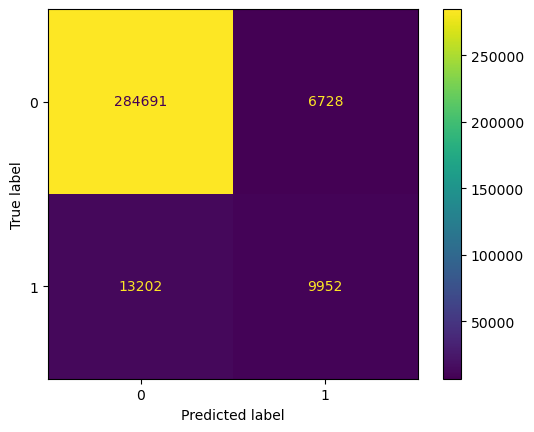

In [14]:
cm_log_bf = confusion_matrix(y_test_before, y_pred_log_bf)
cm_display_bf = ConfusionMatrixDisplay(cm_log_bf).plot()

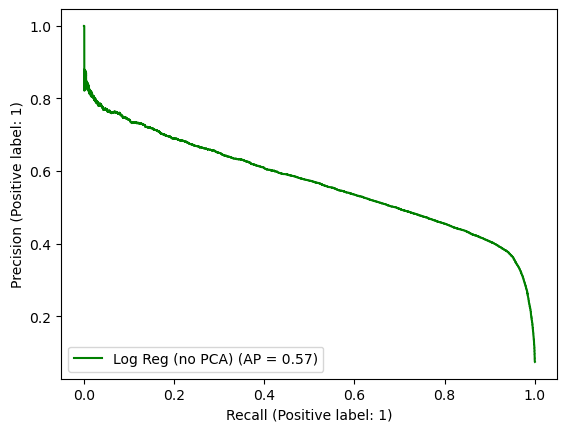

In [15]:
y_prob_log_bf = model_log.predict_proba(X_test_before)[:, 1]

# AUC (ROC)
auc_log_bf = round(roc_auc_score(y_test_before, y_prob_log_bf), 3)

pr_log_bf, rc_log_bf, _ = precision_recall_curve(y_test_before, y_pred_log_bf)
avr_pr_log_bf = average_precision_score(y_test_before, y_pred_log_bf)
pr_auc_log_bf = auc(pr_log_bf, rc_log_bf)
disp_log = PrecisionRecallDisplay.from_predictions(y_test_before, y_prob_log_bf, color = 'g', name = 'Log Reg (no PCA)')

In [57]:
# cross validation for the dataset before one-hot encoding

print(cross_val_score(model_log, X_scaled_before, y_before, cv=5, scoring='accuracy'))

[0.86368643 0.91257182 0.88654126 0.94153494 0.93059629]


By calculating the average score of the results from cross-validation:

Average for Set 1 = (0.795 + 0.498 + 0.869 + 0.9371 + 0.931) / 5 ≈ 0.806

Average for Set 2 = (0.864 + 0.912 + 0.887 + 0.941 + 0.931) / 5 ≈ 0.907

Comparing the averages, the set with the higher average score is generally considered better. Though the accuracy score for data before one-hot encoding is slightly lower than the one after, in this case, Set 2 (the dataset before one-hot encoding procedure) with an average score of approximately 0.905 is better than Set 1 (dataset after applying one-hot encoding) with an average score of approximately 0.806.

In [60]:
# perform GridSearCV for dataset after one-hot encoding 
# the default 'solver' is 'lbfgs'

log_grid_before = GridSearchCV(model_log, log_param, cv=5)
log_grid_before.fit(X_test_before, y_test_before)

print("Best Parameters for data before one-hot encoding ('lbfgs'):", log_grid_before.best_params_)
print("Best Score for for data before one-hot encoding ('lbfgs'):", log_grid_before.best_score_)

Best Parameters for data before one-hot encoding ('lbfgs'): {'C': 10, 'penalty': 'l2'}
Best Score for for data before one-hot encoding ('lbfgs'): 0.9366188482156833


In [61]:
# change solver to 'newton-cholesky'
log_param_2 = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

log_grid_2 = GridSearchCV(LogisticRegression(max_iter=500, solver = 'newton-cg'), log_param_2, cv=5)
log_grid_2.fit(X_test_before, y_test_before)

print("Best Parameters for data before one-hot encoding ('newton-cg'):", log_grid_2.best_params_)
print("Best Score for data before one-hot encoding ('newton-cg') :", log_grid_2.best_score_)

Best Parameters for data before one-hot encoding ('newton-cg'): {'C': 1, 'penalty': 'l2'}
Best Score for data before one-hot encoding ('newton-cg') : 0.9366124903808437


There is no big difference between 'lbfgs' and 'newton-cholesky'

# Random Forest

In [55]:
# fit the random forest model with training data (after one-hot encoding)

rfc = RandomForestClassifier()

rfc.fit(X_train_pca1, y_train_pca1)

RandomForestClassifier()

In [56]:
y_pred_pca1_rfc = rfc.predict(X_test_pca1)
f1_rf_pca = f1_score(y_test_pca1, y_pred_pca1_rfc)

acc_score_rf_pca = rfc.score(X_test_pca1, y_test_pca1)
print(f'the accuracy score of Random Forest after one-hot encoding is:{round(acc_score_rf_pca, 3)}')


the accuracy score of Random Forest after one-hot encoding is:0.933


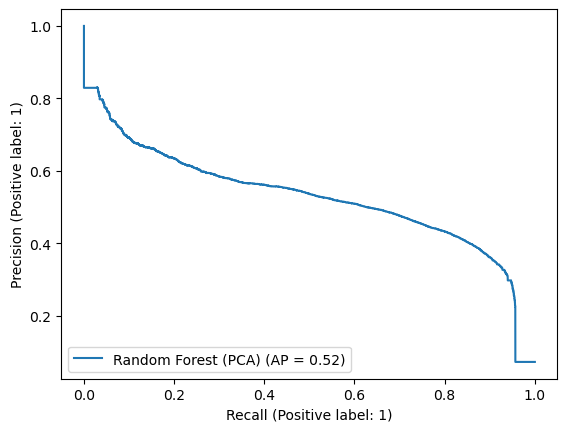

In [18]:
y_prob_rfc_pca = rfc.predict_proba(X_test_pca1)[:, 1]

auc_rf_pca = round(roc_auc_score(y_test_pca1, y_prob_rfc_pca), 3)

pr_rfc_pca, rc_rfc_pca, _ = precision_recall_curve(y_test_pca1, y_pred_pca1_rfc)
avr_pr_rfc_pca = average_precision_score(y_test_pca1, y_pred_pca1_rfc)
pr_auc_rfc = auc(pr_rfc_pca, rc_rfc_pca)
disp_rfc_pca = PrecisionRecallDisplay.from_predictions(y_test_pca1, y_prob_rfc_pca, name = 'Random Forest (PCA)')

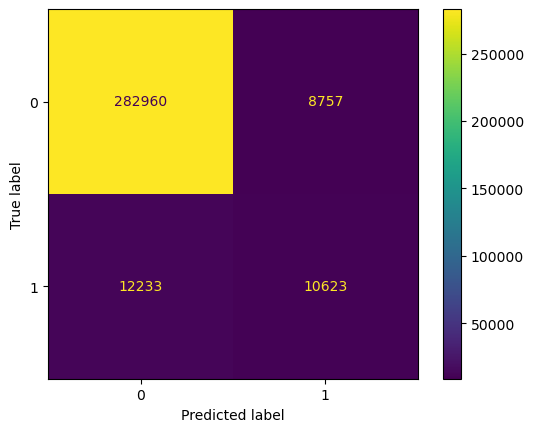

In [123]:
cm_rfc_pca = confusion_matrix(y_test_pca1, y_pred_pca1_rfc)
ConfusionMatrixDisplay(cm_rfc_pca).plot()

In [45]:
# cross validation for the dataset after one-hot encoding
scores_rfc_after = cross_val_score(rfc, X_pca, y, cv=5, scoring='accuracy')

# Print the average performance
print(f'The Average Accuracy (RandomForestClassifier, after one-hot encoding) is: {np.mean(scores_rfc_after)}')

The Average Accuracy (RandomForestClassifier, after one-hot encoding) is: 0.5084357342107145


In [50]:
# fit the random forest model with training data (after one-hot encoding)

rfc.fit(X_train_before, y_train_before)

RandomForestClassifier()

In [53]:
y_pred_rfc_before = rfc.predict(X_test_before)
f1_rf_bf = f1_score(y_test_before, y_pred_rfc_before)

acc_score_rfc_bf = rfc.score(X_test_before, y_test_before)
print(f'the accuracy score of Random Forest before one-hot encoding is:{round(acc_score_rfc_bf, 3)}')

the accuracy score of Random Forest before one-hot encoding is:0.933


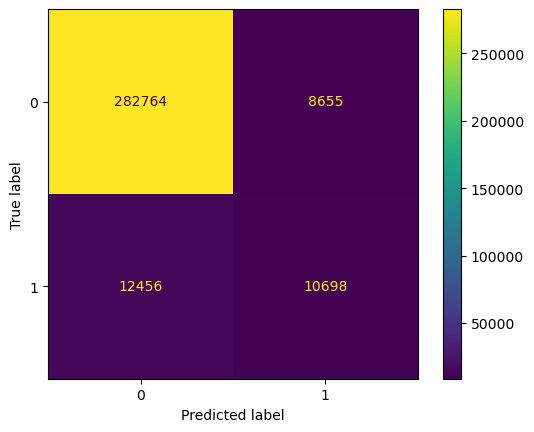

In [43]:
cm_rfc_bf = confusion_matrix(y_test_before, y_pred_rfc_before)
ConfusionMatrixDisplay(cm_rfc_bf).plot()

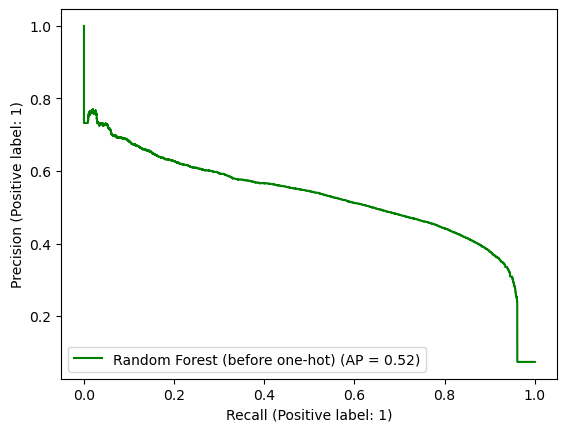

In [21]:
y_prob_rfc_bf = rfc.predict_proba(X_test_before)[:, 1]

# AUC (ROC)
auc_rfc_bf = round(roc_auc_score(y_test_before, y_prob_rfc_bf), 3)

pr_rfc_bf, rc_rfc_bf, _ = precision_recall_curve(y_test_before, y_pred_rfc_before)
avr_pr_rfc_bf = average_precision_score(y_test_before, y_pred_rfc_before)
pr_auc_rfc_bf = auc(pr_rfc_pca, rc_rfc_pca)
disp_rfc_bf = PrecisionRecallDisplay.from_predictions(y_test_before, y_prob_rfc_bf, name = 'Random Forest (before one-hot)', color = 'g')

In [48]:
scores_rfc_before = cross_val_score(rfc, X_scaled_before, y_before, cv=5, scoring='accuracy')

print(f'The Average Accuracy (RandomForestClassifier, before one-hot encoding) is: {np.mean(scores_rfc_before)}')

The Average Accuracy (RandomForestClassifier, before one-hot encoding) is: 0.499815463843788


In [ ]:
# it takes hours to run Gridsearch for random forest so I just leave the code here for this procedure
# generally data after applying one-hot encoding is better, this code is for data after applying one-hot encoding
rfc_params = {"max_depth" : [4,5,6,7], "min_samples_split" : [2,3,5],
              "min_samples_leaf" : [1,2,3,4]}

rf_grid = GridSearchCV(rfc, rfc_params, cv = 5 )
rf_grid.fit(X_train_pca1, y_train_pca1)
rf_grid.best_params_

# Gradient Boosting Classifier

In [66]:
# Gradient Boosting Classifier, after one-hot encoding

gbc = GradientBoostingClassifier()
gbc.fit(X_train_pca1,y_train_pca1)

GradientBoostingClassifier()

In [67]:
y_pred_gbc_pca1 = gbc.predict(X_test_pca1)
f1_gb_pca = f1_score(y_test_pca1, y_pred_gbc_pca1)

the accuracy score of Gradient Boosting Classifier:0.941


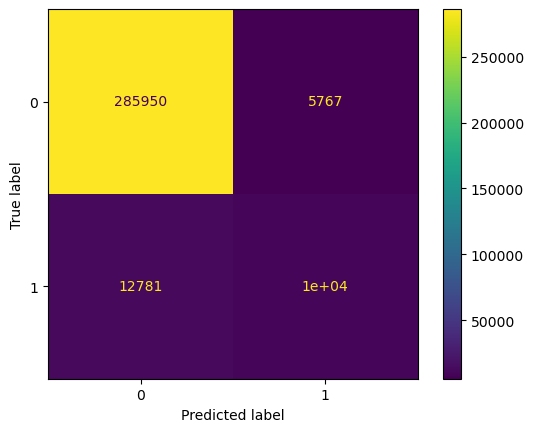

In [23]:

acc_score_gbc_pca = gbc.score(X_test_pca1, y_test_pca1)
print(f'the accuracy score of Gradient Boosting Classifier:{round(acc_score_gbc_pca, 3)}')

cm_gbc_pca = confusion_matrix(y_test_pca1, y_pred_gbc_pca1)
ConfusionMatrixDisplay(cm_gbc_pca).plot()

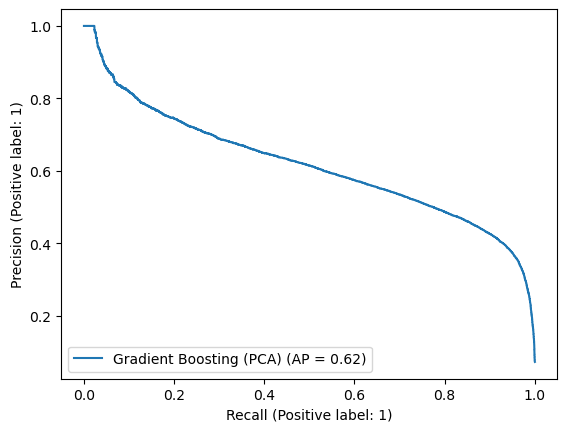

In [24]:
y_prob_gbc_pca = gbc.predict_proba(X_test_pca1)[:, 1]

auc_gbc_pca =  round(roc_auc_score(y_test_pca1, y_prob_gbc_pca), 3)

pr_gbc_pca, rc_gbc_pca, _ = precision_recall_curve(y_test_pca1, y_pred_gbc_pca1)
avr_pr_gbc_pca = average_precision_score(y_test_pca1, y_pred_gbc_pca1)
pr_auc_gbc = auc(pr_gbc_pca, rc_gbc_pca)
disp_gbc_pca = PrecisionRecallDisplay.from_predictions(y_test_pca1, y_prob_gbc_pca, name = 'Gradient Boosting (PCA)')

In [ ]:
# cross validation for data after one-hot encoding
# time-consuming procedure, skip

scores_gbc_after = cross_val_score(gbc, X_pca, y, cv=5, scoring='accuracy')

print(f'The Average Accuracy (Gradient Boosting Classifier, after one-hot encoding) is: {np.mean(scores_gbc_after)}')

In [64]:
# Gradient Boosting Classifier, before one-hot encoding
gbc.fit(X_train_before,y_train_before)


GradientBoostingClassifier()

In [65]:
y_pred_gbc_before = gbc.predict(X_test_before)
f1_gb_bf = f1_score(y_test_before, y_pred_gbc_before)

acc_score_gbc_bf = gbc.score(X_test_before, y_test_before)
print(f'the accuracy score of Gradient Boosting Classifier:{round(acc_score_gbc_bf, 3)}')

the accuracy score of Gradient Boosting Classifier:0.941


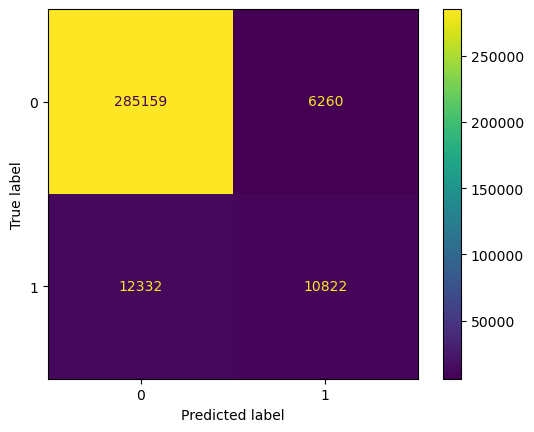

In [113]:

cm_gbc = confusion_matrix(y_test_before, y_pred_gbc_before)
ConfusionMatrixDisplay(cm_gbc).plot()

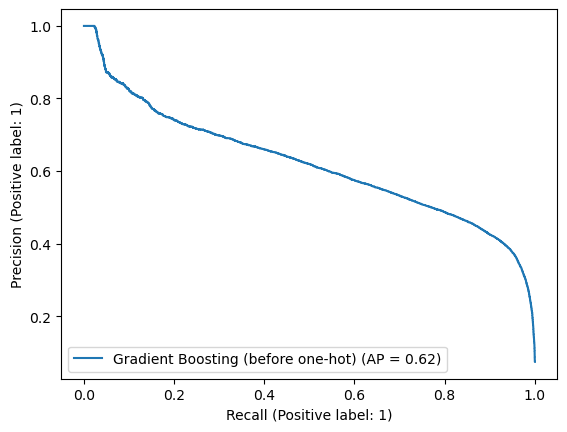

In [27]:
y_prob_gbc_bf = gbc.predict_proba(X_test_before)[:, 1]

# AUC of ROC
auc_gbc_bf =  round(roc_auc_score(y_test_before, y_prob_gbc_bf), 3)

pr_gbc_bf, rc_gbc_bf, _ = precision_recall_curve(y_test_before, y_pred_gbc_before)
avr_pr_gbc_bf = average_precision_score(y_test_before, y_pred_gbc_before)
pr_auc_gbc_bf = auc(pr_gbc_bf, rc_gbc_bf)
disp_gbc_bf = PrecisionRecallDisplay.from_predictions(y_test_before, y_prob_gbc_bf, name = 'Gradient Boosting (before one-hot)')

In [ ]:
# cross validation for data before one-hot encoding
# time-consuming procedure, skip

scores_gbc_before = cross_val_score(gbc, X_scaled_before, y_before, cv=5, scoring='accuracy')

print(f'The Average Accuracy (Gradient Boosting Classifier, before one-hot encoding) is: {np.mean(scores_gbc_before)}')

In [ ]:
# Gridsearch for GradientBoostingClassifier
# time-consuming procedure, skip

gbc_params = {
  "max_depth"  : [3,4,5,6],
  "learning_rate": [0.05, 0.1, 0.2, 0.5]
    
}
gbc_grid = GridSearchCV(gbc, gbc_params,cv = 5)
gbc_grid.fit(X_train_pca1, y_train_pca1)
gbc_grid.best_params_

# XG Boosting

In [60]:
# XG Boosting, for data after one-hot encoding

model_xgb = XGBClassifier(objective='binary:logistic')
model_xgb.fit(X_train_pca1,y_train_pca1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
y_pred_xgb_pca1 = model_xgb.predict(X_test_pca1)
f1_xg_pca = f1_score(y_test_pca1, y_pred_xgb_pca1)

acc_score_xgb_pca = model_xgb.score(X_test_pca1, y_test_pca1)
print(f'the accuracy score of XG Boosting (after one-hot encoding):{round(acc_score_xgb_pca, 3)}')

the accuracy score of XG Boosting (after one-hot encoding):0.941


the accuracy score of XG Boosting (after one-hot encoding):0.941


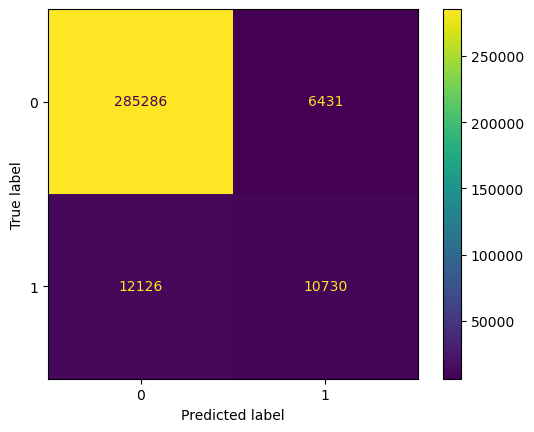

In [29]:
cm_xgb = confusion_matrix(y_test_pca1, y_pred_xgb_pca1)
ConfusionMatrixDisplay(cm_xgb).plot()

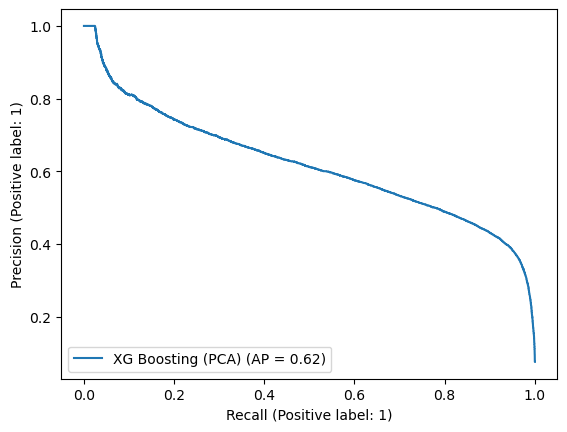

In [30]:
y_prob_xgb_pca = model_xgb.predict_proba(X_test_pca1)[:, 1]

auc_xgb_pca = round(roc_auc_score(y_test_pca1, y_prob_xgb_pca), 3)

pr_xgb_pca, rc_xgb_pca, _ = precision_recall_curve(y_test_pca1, y_pred_xgb_pca1)
avr_pr_xgb_pca = average_precision_score(y_test_pca1, y_pred_xgb_pca1)
pr_auc_xgb = auc(pr_xgb_pca, rc_xgb_pca)
disp_xgb_pca = PrecisionRecallDisplay.from_predictions(y_test_pca1, y_prob_xgb_pca, name = 'XG Boosting (PCA)')

In [59]:
# cross validation for the dataset after one-hot encoding
scores_xgb_after = cross_val_score(model_xgb, X_pca, y, cv=5, scoring='accuracy')

# Print the average performance
print(f'The Average Accuracy (XG boosting, after one-hot encoding) is: {np.mean(scores_xgb_after)}')

The Average Accuracy (XG boosting, after one-hot encoding) is: 0.5237193333810171


In [62]:
model_xgb.fit(X_train_before,y_train_before)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred_xgb_before = model_xgb.predict(X_test_before)
f1_xg_bf = f1_score(y_test_before, y_pred_xgb_before)

acc_score_xgb_bf = model_xgb.score(X_test_before, y_test_before)
print(f'the accuracy score of XG Boosting (after one-hot encoding):{round(acc_score_xgb_bf, 3)}')


the accuracy score of XG Boosting (after one-hot encoding):0.941


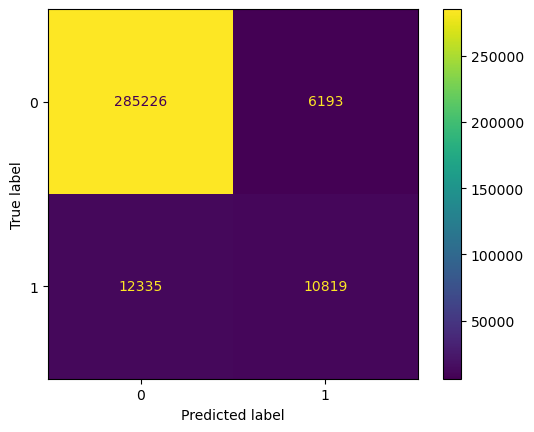

In [33]:
cm_xgb_bf = confusion_matrix(y_test_before, y_pred_xgb_before)
ConfusionMatrixDisplay(cm_xgb_bf).plot()

In [62]:
# cross validation for the dataset before one-hot encoding
scores_xgb_before = cross_val_score(model_xgb, X_scaled_before, y_before, cv=5, scoring='accuracy')

# Print the average performance
print(f'The Average Accuracy (XG boosting, after one-hot encoding) is: {np.mean(scores_xgb_before)}')

The Average Accuracy (XG boosting, after one-hot encoding) is: 0.4806284719738693


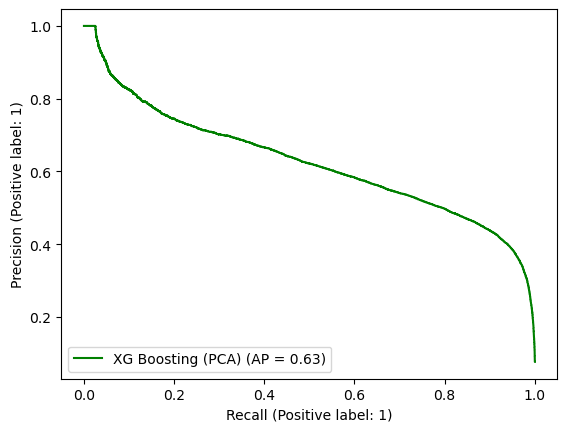

In [34]:
y_prob_xgb_bf = model_xgb.predict_proba(X_test_before)[:, 1]

# AUC of ROC
auc_xgb_bf =  round(roc_auc_score(y_test_before, y_prob_xgb_bf), 3)

pr_xgb_bf, rc_xgb_bf, _ = precision_recall_curve(y_test_before, y_pred_xgb_before )
avr_pr_xgb_bf = average_precision_score(y_test_before, y_pred_xgb_before )
pr_auc_xgb_bf = auc(pr_xgb_bf, rc_xgb_bf)
disp_xgb_bf= PrecisionRecallDisplay.from_predictions(y_test_before, y_prob_xgb_bf, name = 'XG Boosting (PCA)', color = 'g')

Data after applying one-hot encoding (accuracy = 0.941, cross validation score average = 0.524) is generally performs better compared to data before one-hot encoding (accuracy = 0.941, cross validation score average = 0.481).

In [64]:
# Gridsearch for data after one-hot encoding

xgb_params = {
  "max_depth"  : [2,4,5,6],
  "learning_rate": [0.1, 0.2, 0.5, 1],
    
}
xgb_grid = GridSearchCV(model_xgb, xgb_params, cv=5)
xgb_grid.fit(X_train_pca1, y_train_pca1)
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5}

# Summery of metrics

In [76]:
# Creating dataframe for metrics

metrics_data = {'Model Name': ['LR', 'LR(PCA)', 'RF', 'RF(PCA)', 'GB', 'GB(PCA)', 'XG','XG(PCA)' ],
                'Model Accuracy': [acc_score_log_bf, acc_score_log,  acc_score_rfc_bf, acc_score_rf_pca, acc_score_gbc_bf, 
                                   acc_score_gbc_pca, acc_score_xgb_bf, acc_score_xgb_pca],
                'AUC-ROC': [auc_log_bf, auc_log_pca, auc_rfc_bf, auc_rf_pca, auc_gbc_bf, auc_gbc_pca, auc_xgb_bf, auc_xgb_pca],
                'AUC-PR': [pr_auc_log_bf, pr_auc_log, pr_auc_rfc_bf, pr_auc_rfc, pr_auc_gbc_bf, pr_auc_gbc, 
                           pr_auc_xgb_bf, pr_auc_xgb],
                'Average Precision': [avr_pr_log_bf, avr_pr_log_pca,  avr_pr_rfc_bf, avr_pr_rfc_pca, avr_pr_gbc_bf, 
                                      avr_pr_gbc_pca, avr_pr_xgb_bf, avr_pr_xgb_pca], 
                'F1_score': [f1_log_pca, f1_log_bf, f1_rf_pca, f1_rf_bf, f1_gb_pca, f1_gb_bf, f1_xg_pca, f1_xg_bf]}
                

metrics_df = pd.DataFrame(metrics_data)

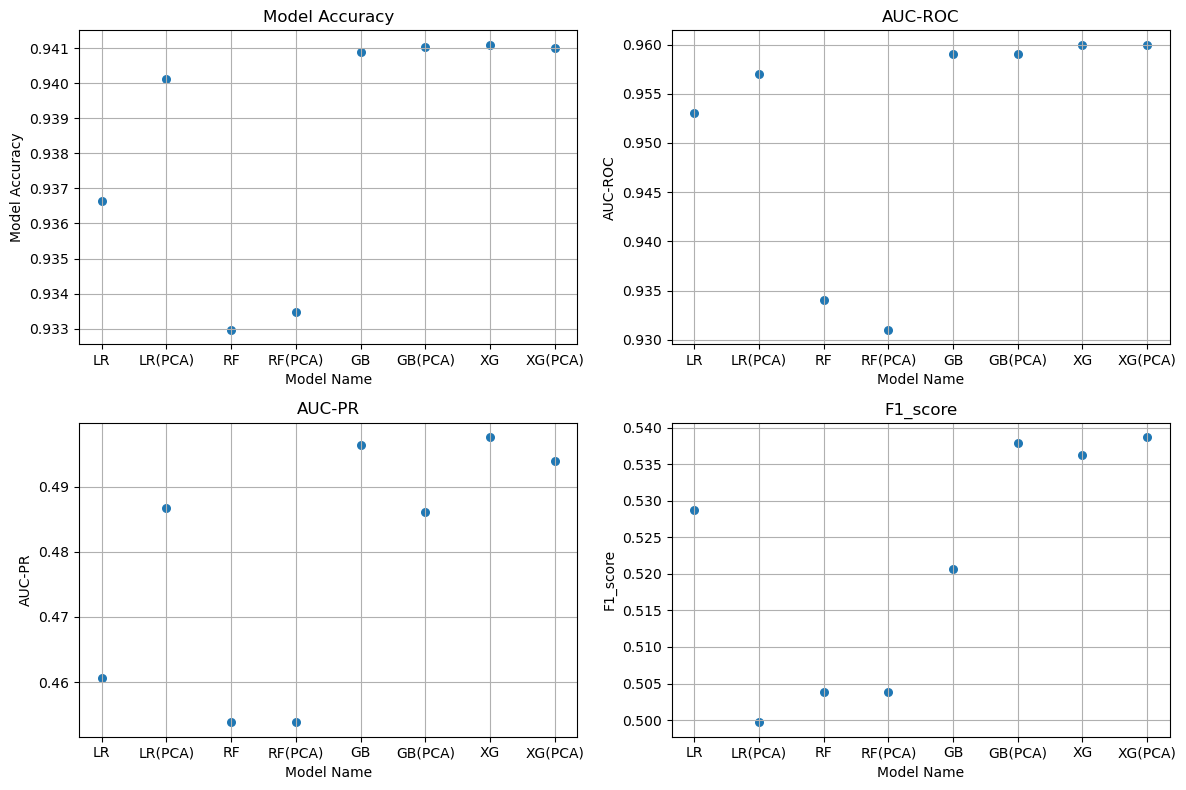

In [80]:
# the overview: Creating subplots for each metrics

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics_df.plot(kind = 'scatter', x='Model Name', y='Model Accuracy',  ax=axes[0, 0], s= 30)
axes[0, 0].set_title('Model Accuracy')
axes[0, 0].grid()

metrics_df.plot(kind = 'scatter', x='Model Name', y='AUC-ROC',  ax=axes[0, 1], s= 30)
axes[0, 1].set_title('AUC-ROC')
axes[0, 1].grid()

metrics_df.plot(kind = 'scatter', x='Model Name', y= 'AUC-PR', ax=axes[1, 0], s= 30)
axes[1, 0].set_title('AUC-PR')
axes[1, 0].grid()


metrics_df.plot(kind = 'scatter', x='Model Name', y= 'F1_score', ax=axes[1, 1], s= 30)
axes[1, 1].set_title('F1_score')
axes[1, 1].grid()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

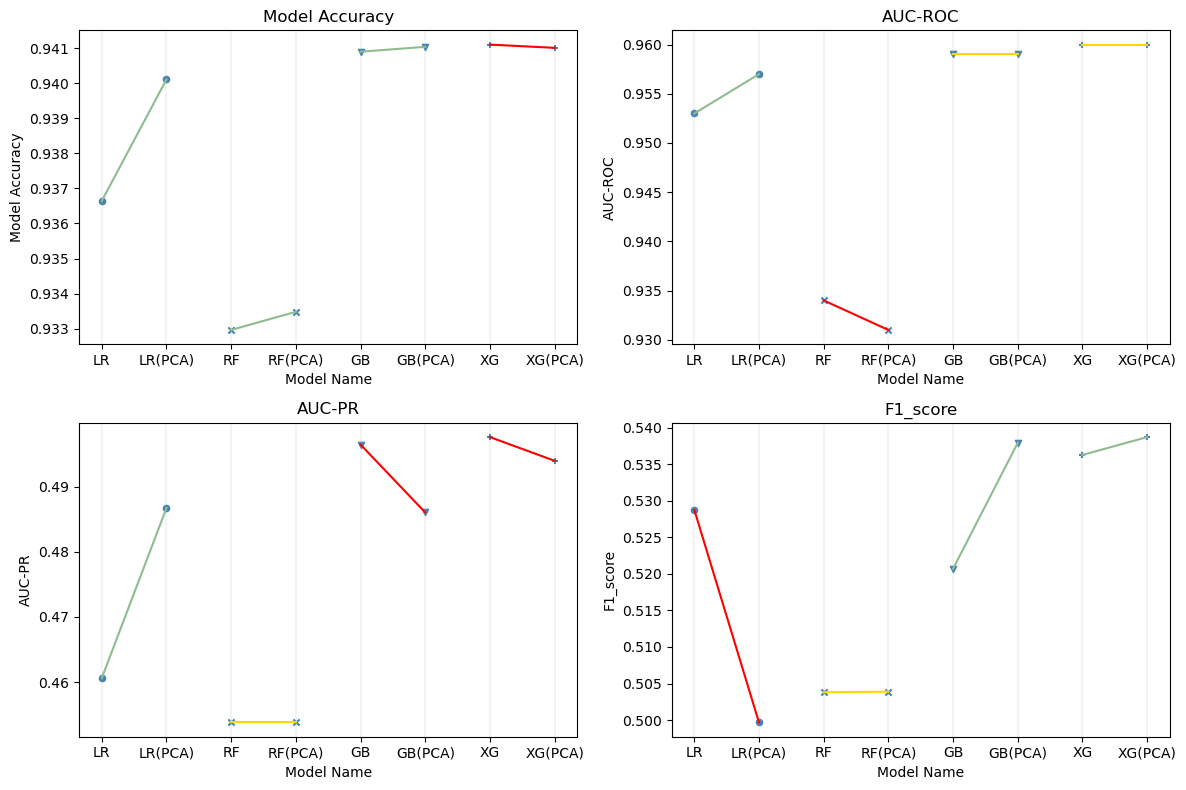

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

df_lr = metrics_df[metrics_df['Model Name'].isin(['LR', 'LR(PCA)'])]
df_rf = metrics_df[metrics_df['Model Name'].isin(['RF', 'RF(PCA)'])]
df_gb = metrics_df[metrics_df['Model Name'].isin(['GB', 'GB(PCA)'])]
df_xg = metrics_df[metrics_df['Model Name'].isin(['XG', 'XG(PCA)'])]

# Scatter plot for Model Accuracy with line connecting points
df_lr.plot(kind='scatter', x='Model Name', y='Model Accuracy', color='steelblue', marker='o', ax=axes[0, 0])
df_rf.plot(kind='scatter', x='Model Name', y='Model Accuracy', color='steelblue', marker='x', ax=axes[0, 0])
df_gb.plot(kind='scatter', x='Model Name', y='Model Accuracy', color='steelblue', marker='v', ax=axes[0, 0])
df_xg.plot(kind='scatter', x='Model Name', y='Model Accuracy', color='steelblue', marker='+', ax=axes[0, 0])
axes[0, 0].plot(df_lr['Model Name'], df_lr['Model Accuracy'], color='darkseagreen', linestyle='-')
axes[0, 0].plot(df_rf['Model Name'], df_rf['Model Accuracy'], color='darkseagreen', linestyle='-')
axes[0, 0].plot(df_gb['Model Name'], df_gb['Model Accuracy'], color='darkseagreen', linestyle='-')
axes[0, 0].plot(df_xg['Model Name'], df_xg['Model Accuracy'], color='red', linestyle='-')
axes[0, 0].grid(axis = 'x', linewidth=0.2)
axes[0, 0].set_title('Model Accuracy')

# Scatter plot for AUC-ROC with line connecting points
df_lr.plot(kind='scatter', x='Model Name', y='AUC-ROC', color='steelblue', marker='o', ax=axes[0, 1])
df_rf.plot(kind='scatter', x='Model Name', y='AUC-ROC', color='steelblue', marker='x', ax=axes[0, 1])
df_gb.plot(kind='scatter', x='Model Name', y='AUC-ROC', color='steelblue', marker='v', ax=axes[0, 1])
df_xg.plot(kind='scatter', x='Model Name', y='AUC-ROC', color='steelblue', marker='+', ax=axes[0, 1])
axes[0, 1].plot(df_lr['Model Name'], df_lr['AUC-ROC'], color='darkseagreen', linestyle='-')
axes[0, 1].plot(df_rf['Model Name'], df_rf['AUC-ROC'], color='red', linestyle='-')
axes[0, 1].plot(df_gb['Model Name'], df_gb['AUC-ROC'], color='gold', linestyle='-')
axes[0, 1].plot(df_xg['Model Name'], df_xg['AUC-ROC'], color='gold', linestyle='-')
axes[0, 1].grid(axis = 'x', linewidth=0.2)
axes[0, 1].set_title('AUC-ROC')

# Scatter plot for AUC-PR with line connecting points
df_lr.plot(kind='scatter', x='Model Name', y='AUC-PR', color='steelblue', marker='o', ax=axes[1, 0])
df_rf.plot(kind='scatter', x='Model Name', y='AUC-PR', color='steelblue', marker='x', ax=axes[1, 0])
df_gb.plot(kind='scatter', x='Model Name', y='AUC-PR', color='steelblue', marker='v', ax=axes[1, 0])
df_xg.plot(kind='scatter', x='Model Name', y='AUC-PR', color='steelblue', marker='+', ax=axes[1, 0])
axes[1, 0].plot(df_lr['Model Name'], df_lr['AUC-PR'], color='darkseagreen', linestyle='-')
axes[1, 0].plot(df_rf['Model Name'], df_rf['AUC-PR'], color='gold', linestyle='-')
axes[1, 0].plot(df_gb['Model Name'], df_gb['AUC-PR'], color='red', linestyle='-')
axes[1, 0].plot(df_xg['Model Name'], df_xg['AUC-PR'], color='red', linestyle='-')
axes[1, 0].grid(axis = 'x', linewidth=0.2)
axes[1, 0].set_title('AUC-PR')

# Scatter plot for F1 score with line connecting points
df_lr.plot(kind='scatter', x='Model Name', y='F1_score', color='steelblue', marker='o', ax=axes[1, 1])
df_rf.plot(kind='scatter', x='Model Name', y='F1_score', color='steelblue', marker='x', ax=axes[1, 1])
df_gb.plot(kind='scatter', x='Model Name', y='F1_score', color='steelblue', marker='v', ax=axes[1, 1])
df_xg.plot(kind='scatter', x='Model Name', y='F1_score', color='steelblue', marker='+', ax=axes[1, 1])
axes[1, 1].plot(df_lr['Model Name'], df_lr['F1_score'], color='red', linestyle='-')
axes[1, 1].plot(df_rf['Model Name'], df_rf['F1_score'], color='gold', linestyle='-')
axes[1, 1].plot(df_gb['Model Name'], df_gb['F1_score'], color='darkseagreen', linestyle='-')
axes[1, 1].plot(df_xg['Model Name'], df_xg['F1_score'], color='darkseagreen', linestyle='-')
axes[1, 1].grid(axis = 'x', linewidth=0.2)
axes[1, 1].set_title('F1_score')

# Show the plot
plt.tight_layout()
plt.show()


In [69]:
metrics_df.set_index('Model Name', inplace=True)
metrics_df

,Model Accuracy,AUC-ROC,AUC-PR,Average Precision,F1_score
Model Name,,,,,
LR,0.936644,0.953,0.460610,0.298416,0.528764
LR(PCA),0.940109,0.957,0.486732,0.324516,0.499674
RF,0.932963,0.934,0.453797,0.295481,0.503806
RF(PCA),0.933481,0.931,0.453797,0.294194,0.503882
GB,0.940898,0.959,0.496459,0.335310,0.520699
GB(PCA),0.941038,0.959,0.486043,0.320966,0.537926
XG,0.941101,0.960,0.497614,0.336374,0.536272
XG(PCA),0.941009,0.960,0.493974,0.332080,0.538714


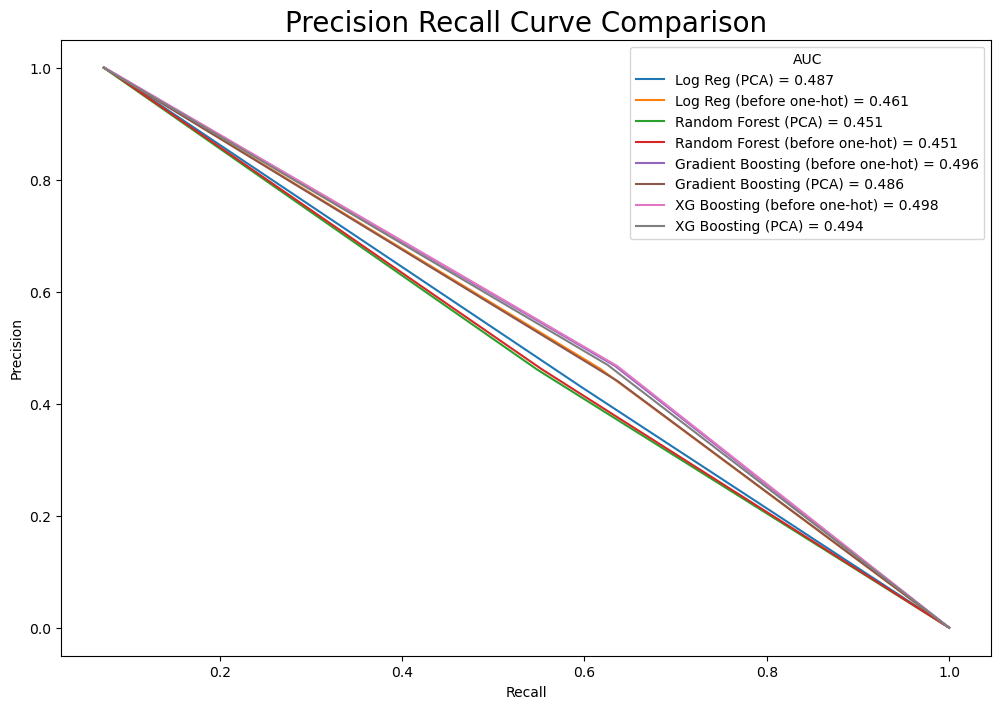

In [176]:
_ = plt.figure(figsize=(12,8))
_ = plt.title('Precision Recall Curve Comparison', size=20)
_ = plt.plot(pr_log_bf, rc_log_bf, label = 'Log Reg (PCA) = %0.3f' % pr_auc_log)
_ = plt.plot(pr_log_pca, rc_log_pca, label = 'Log Reg (before one-hot) = %0.3f' % pr_auc_log_bf)
_ = plt.plot(pr_rfc_pca, rc_rfc_pca, label = 'Random Forest (PCA) = %0.3f' % pr_auc_rfc)
_ = plt.plot(pr_rfc_bf, rc_rfc_bf, label = 'Random Forest (before one-hot) = %0.3f' % pr_auc_rfc_bf)
_ = plt.plot(pr_gbc_bf, rc_gbc_bf, label = 'Gradient Boosting (before one-hot) = %0.3f' % pr_auc_gbc_bf)
_ = plt.plot(pr_gbc_pca, rc_gbc_pca, label = 'Gradient Boosting (PCA) = %0.3f' % pr_auc_gbc)
_ = plt.plot(pr_xgb_bf, rc_xgb_bf, label = 'XG Boosting (before one-hot) = %0.3f' % pr_auc_xgb_bf )
_ = plt.plot(pr_xgb_pca, rc_xgb_pca, label = 'XG Boosting (PCA) = %0.3f' % pr_auc_xgb)



_ = plt.ylabel('Precision')
_ = plt.xlabel('Recall')
_ = plt.legend(title='AUC')
_ = plt.show()


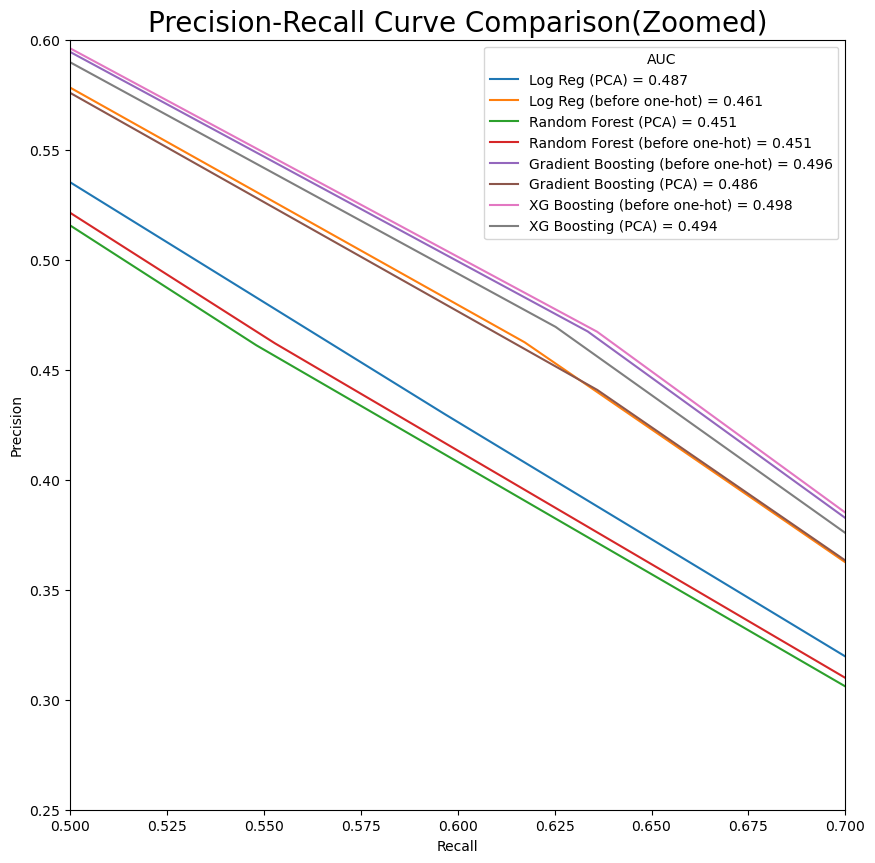

In [181]:
_ = plt.figure(figsize=(10,10))
_ = plt.title('Precision-Recall Curve Comparison(Zoomed)', size=20)
_ = plt.plot(pr_log_bf, rc_log_bf, label = 'Log Reg (PCA) = %0.3f' % pr_auc_log)
_ = plt.plot(pr_log_pca, rc_log_pca, label = 'Log Reg (before one-hot) = %0.3f' % pr_auc_log_bf)
_ = plt.plot(pr_rfc_pca, rc_rfc_pca, label = 'Random Forest (PCA) = %0.3f' % pr_auc_rfc)
_ = plt.plot(pr_rfc_bf, rc_rfc_bf, label = 'Random Forest (before one-hot) = %0.3f' % pr_auc_rfc_bf)
_ = plt.plot(pr_gbc_bf, rc_gbc_bf, label = 'Gradient Boosting (before one-hot) = %0.3f' % pr_auc_gbc_bf)
_ = plt.plot(pr_gbc_pca, rc_gbc_pca, label = 'Gradient Boosting (PCA) = %0.3f' % pr_auc_gbc)
_ = plt.plot(pr_xgb_bf, rc_xgb_bf, label = 'XG Boosting (before one-hot) = %0.3f' % pr_auc_xgb_bf )
_ = plt.plot(pr_xgb_pca, rc_xgb_pca, label = 'XG Boosting (PCA) = %0.3f' % pr_auc_xgb)

_ = plt.ylabel('Precision')
_ = plt.xlabel('Recall')
_ = plt.legend(title='AUC')
_ = plt.xlim(0.5, 0.7)
_ = plt.ylim(0.25,0.6)
_ = plt.show()

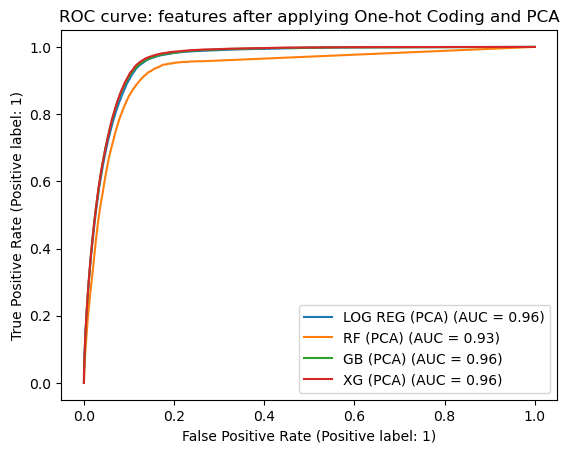

In [102]:
# Creating ROC curve for models
_, ax = plt.subplots()

models = [("LOG REG (PCA)", model_log), ("RF (PCA)", rfc), ("GB (PCA)", gbc), ("XG (PCA)", model_xgb)]

model_displays_pca = {}
for name, pipeline in models:
    model_displays_pca[name] = RocCurveDisplay.from_estimator(
        pipeline, X_test_pca1, y_test_pca1, ax=ax, name=name
    )
_ = ax.set_title("ROC curve: features after applying One-hot Coding and PCA")


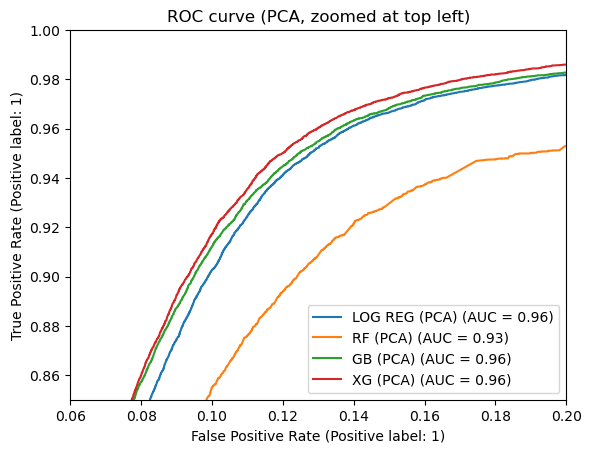

In [103]:
# Zoom a little bit
_, ax = plt.subplots()
for name, pipeline in models:
    model_displays_pca[name].plot(ax=ax)

ax.set_xlim(0.06, 0.2)
ax.set_ylim(0.85, 1)
_ = ax.set_title("ROC curve (PCA, zoomed at top left)")

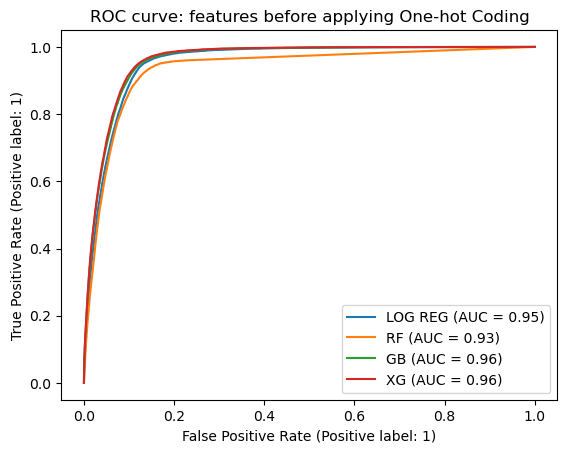

In [138]:
# Creating ROC curve for models (before one-hot coding)
_, ax = plt.subplots()

models = [("LOG REG", model_log), ("RF", rfc), ("GB", gbc), ("XG", model_xgb)]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, X_test_before, y_test_before, ax=ax, name=name
    )
_ = ax.set_title("ROC curve: features before applying One-hot Coding")

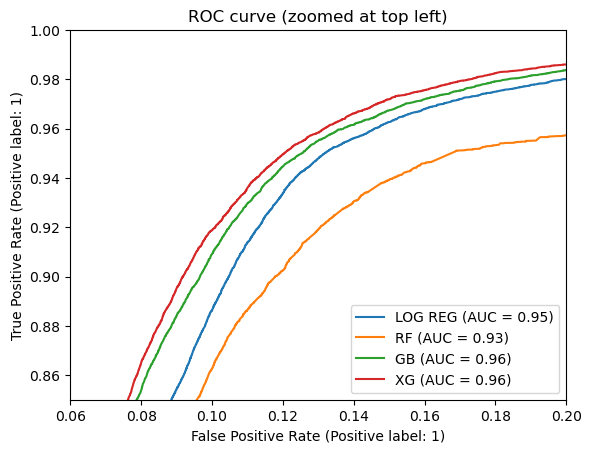

In [140]:
# Zoom a little bit
_, ax = plt.subplots()
for name, pipeline in models:
    model_displays[name].plot(ax=ax)

ax.set_xlim(0.06, 0.2)
ax.set_ylim(0.85, 1)
_ = ax.set_title("ROC curve (zoomed at top left)")